<h1 align=''center>Pré-processamento das Séries Temporais</h1>
<p align = 'center'><img src = "https://deak.com.br/wp-content/uploads/2016/02/fev_5-1800x541-1.png", height="350", width="600"></p>
<p align = "justify">O<b> pré-processamento de uma Série Temporal </b> é uma parte importante do Machine Learning, que por vezes é negligenciada por muitos Cientistas de Dados. Diversos livros na literatura especializada, não abordam essa prática com a devida atenção que deve ser dispensada. Os reflexos de um mau pré-processamento ocorrem na fase de implementação do algoritmo apontando para resultados com baixa qualidade. É bem verdade que é normal as pessoas serem atraídas pela performace/implementação dos algoritmo de <i>Machine Learning</i> e relegarem as ações de pré-processamento ao segundo plano.</p>
<p align ='justify'>Um fato a ser considerado é que o pré-processamento é, em alguns conjuntos de dados, uma tarefa bem fácil de se executar e que tem um grande impacto no resultado da performance do modelo de <i>Machine Learning</i>. E em relação a isso é válido lembrar a seguinte expressão "Lixo que entra, Lixo que sai".</p>
<h3>O pré-processamento</h3>
<p align = 'justify'>Quem trabalha com a Análise de Dados sabe que por vezes as fontes dos dados são diversas e isso causa muita confusão na hora da aplicação dos modelos. As inconsistências, erros de gravação, múltiplas fontes de dados são alguns dos desafios que os cientistas de dados ou Engenheiros de Dados lidam diariamente para prover a melhor qualidade dos dados para as aplicações previstas.</p>
<p align =' justify'>algumas técnicas são importantes para a implementação de um bom pré-processamento:</p>
<li><i>Feature transforms</i>: realiza adaptações no conjunto de dados.</li>
<li><i>Feature engineering</i>: constroí outras características a partir dos dados, criando um complexidade positiva no modelo.</li>

<p align='justify'> A nossa meta é conseguir extrair características do conjunto de dados que nos possibilitem tornar o modelo mais fácil para o treinamento e avaliação ou para melhorar a qualidade das predições do modelo, de forma a ter características que apontem para a variável alvo.</p>

<h3><i>Features Transforms</i></h3>
<p align="justify">Muitos modelos partem do princípio que os dados estão organizados em uma Distribuição Normal. Infelizmente esta não é a realidade, frequentemente os dados encontrados não estão em uma distribuição normal, e isto pode afetar os resultados dos modelos.</p>

<h4><i>Scaling</i></h4>
<p align='justify'>Existem 2(dois) métodos mais comuns para lidar com o escalonamento: <b>Min-Max scaling</b> e o <b>Z-score normalization</b>.</p>

<h4>Transformações Logarítmicas e de Poder</h4>
<p align='justify'>A transformação logaritmo é aplicação em cada valor de <i>x</i> pelo <i>log(x)</i>. A função logarítmica é o inverso da função exponencial,e com isso é importante lembrar que o intervalo entre 0 e 1 é o limite da função. A escolha da transformação logarítmica é para tornar as características mais próximas da distribuição normal.</p>
<p>As transformações de poder buscam preservar a ordem original. As duas principais transformações de poder são:</p>
<li><i>Box-Cox transformation</i></li>
<li><i>Yeo-Johnson</i></li>

<h4>Imputações</h4>
<p align='justify'>A definição de <b>imputações</b> é a substituição de valores omissos. Para isso, existem 2 (duas) técnicas importantes para imputações:</p>
<li>Unitária - Onde os valores são substituídos por 0 ou pela média.</li>
<li>Baseada no modelo - Onde os valores são substituídos pelas predições de um modelo de <i>Machine Learning.<i/></li>


<h3><i>Feature Engineering</i></h3>
<p align='justify'>Como foi falado, o objetivo do <i>feature engineering</i> é produzir novas <i>features</i> que possam nos ajudar no processo de <i>Machine Learning</i>.</p>

<h4>Características relacionadas à data-hora</h4>
<p align='justify'>Se tivermos as datas completas (dias-mês-ano) poderemos extraír as informações relativas apenas ao ano, aos meses, entre outras, e com isso contruir novas características. De igual forma, poderemos fazer com os horários, poderemos extraír as informações de durante o expediente ou fora do expediente, no período de almoço ou nos intervalos dos turnos previstos, entre outras características. Para executar essa tarefa existem algumas bibliotecas no Python para facilitar as transformações que porventura viermos a produzir nos dados originais.</p>


<h2>Transformações na Prática</h2>

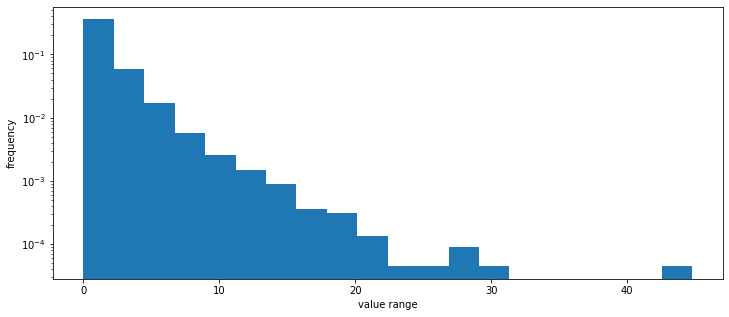

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import numpy as np
np.random.seed(0)
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)
plt.figure(figsize=(12,5))
plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range")
plt.grid(False)

Significancia: 0.00
Significancia: 0.00


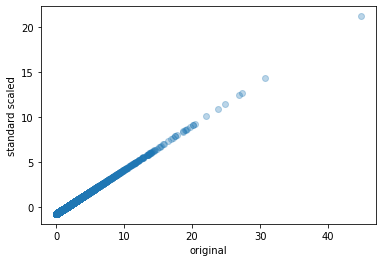

In [184]:
# Aplicando a Transformação Normalização Padrão para Z-Scores
from sklearn.preprocessing import StandardScaler, minmax_scale
from scipy.stats import normaltest
scaler = StandardScaler()
vals_mm = minmax_scale(vals)
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))
_, p = normaltest(vals_ss.squeeze())
print(f"Significancia: {p:.2f}")

_, p = normaltest(vals_mm.squeeze())
print(f"Significancia: {p:.2f}")

plt.scatter(vals, vals_ss, alpha=0.3)
plt.ylabel("standard scaled")
plt.xlabel("original")
plt.show()

Significância: 0.31


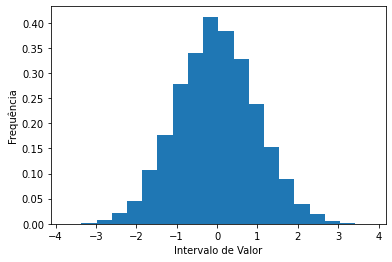

In [185]:
# Apresentando a Transformação Logarítmica
from statsmodels.stats.diagnostic import kstest_normal

log_transformed = np.log(vals)
_, p = kstest_normal(log_transformed)  # stats.normaltest
print(f"Significância: {p:.2f}")
np.std(log_transformed)
np.mean(log_transformed)
plt.hist(log_transformed, bins=20, density=True)
#plt.yscale("log")
plt.ylabel("Frequência")
plt.xlabel("Intervalo de Valor")
plt.show()

Significância: 0.46


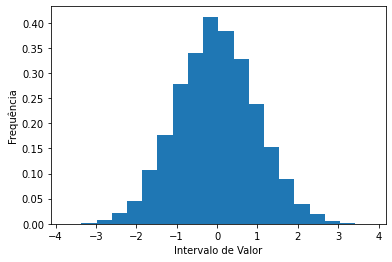

In [186]:
from scipy.stats import boxcox
vals_bc = boxcox(vals, 0.0)
_, p = normaltest(vals_bc)
print(f"Significância: {p:.2f}")
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("Frequência")
plt.xlabel("Intervalo de Valor")
plt.show()

In [187]:
# Temos valores Faltosos
voos  = pd.read_csv('data/lax_to_jfk.csv')
voos.isnull().sum()

Month                   0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
Dest                    0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
CarrierDelay         2486
WeatherDelay         2486
NASDelay             2486
SecurityDelay        2486
LateAircraftDelay    2486
DepDelay                0
DepDelayMinutes         0
DivDistance          2855
DivArrDelay          2855
dtype: int64

In [188]:
# Imputations
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(np.array(voos[['CarrierDelay', 'WeatherDelay']]))[:10]

array([[18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997],
       [18.04878049,  0.99728997]])

In [189]:
from typing import List
from dateutil.relativedelta import relativedelta, TH
import datetime

from workalendar.america.brazil import BrazilSaoPauloCity
BrazilSaoPauloCity().holidays()

[(datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 25), 'Anniversary of the city of São Paulo'),
 (datetime.date(2022, 3, 1), 'Carnaval'),
 (datetime.date(2022, 4, 15), 'Sexta-feira da Paixão'),
 (datetime.date(2022, 4, 17), 'Easter Sunday'),
 (datetime.date(2022, 4, 21), "Tiradentes' Day"),
 (datetime.date(2022, 5, 1), 'Labour Day'),
 (datetime.date(2022, 6, 16), 'Corpus Christi'),
 (datetime.date(2022, 7, 9), 'Constitutional Revolution of 1932'),
 (datetime.date(2022, 9, 7), 'Independence Day'),
 (datetime.date(2022, 10, 12), 'Our Lady of Aparecida'),
 (datetime.date(2022, 11, 2), "All Souls' Day"),
 (datetime.date(2022, 11, 15), 'Republic Day'),
 (datetime.date(2022, 11, 20), 'Dia da Consciência Negra'),
 (datetime.date(2022, 12, 25), 'Christmas Day')]

In [190]:
def create_custom_holidays(year) -> List:
    custom_holidays = BrazilSaoPauloCity().holidays()
    custom_holidays.append((
        (datetime.datetime(year, 11, 1) + relativedelta(weekday=TH(+4)) + datetime.timedelta(days=1)).date(),
        "Black Friday"))
    return {k: v for (k, v) in custom_holidays}

custom_holidays = create_custom_holidays(2022)

In [191]:
custom_holidays

{datetime.date(2022, 1, 1): 'New year',
 datetime.date(2022, 1, 25): 'Anniversary of the city of São Paulo',
 datetime.date(2022, 3, 1): 'Carnaval',
 datetime.date(2022, 4, 15): 'Sexta-feira da Paixão',
 datetime.date(2022, 4, 17): 'Easter Sunday',
 datetime.date(2022, 4, 21): "Tiradentes' Day",
 datetime.date(2022, 5, 1): 'Labour Day',
 datetime.date(2022, 6, 16): 'Corpus Christi',
 datetime.date(2022, 7, 9): 'Constitutional Revolution of 1932',
 datetime.date(2022, 9, 7): 'Independence Day',
 datetime.date(2022, 10, 12): 'Our Lady of Aparecida',
 datetime.date(2022, 11, 2): "All Souls' Day",
 datetime.date(2022, 11, 15): 'Republic Day',
 datetime.date(2022, 11, 20): 'Dia da Consciência Negra',
 datetime.date(2022, 12, 25): 'Christmas Day',
 datetime.date(2022, 11, 25): 'Black Friday'}

In [192]:
def is_holiday(current_date: datetime.date):
    """Determina se é um Feriado"""
    return custom_holidays.get(current_date, False)

today = datetime.date(2022, 3, 13)
is_holiday(today)

False

In [193]:
# Dia de Pagamento
# Imagine que as pessoas recebem pagamentos no  meio do mês ou no final do mês.

In [194]:
# Função que captura a última Sexta-Feira do Mês
import calendar
def get_last_friday(current_date: datetime.date, weekday=calendar.
                    FRIDAY):
    return max(week[weekday]
               for week in calendar.monthcalendar(
        current_date.year, current_date.month
    ))
get_last_friday(today)

25

In [195]:
# Estação do ano
YEAR = 2021
estacao = [
    ('Inverno', (datetime.date(YEAR, 1, 1), datetime.date(YEAR, 3, 20))),
    ('Primavera', (datetime.date(YEAR, 3, 21), datetime.date(YEAR, 6, 20))),
    ('Verão', (datetime.date(YEAR, 6, 21), datetime.date(YEAR, 9, 22))),
    ('Outorno', (datetime.date(YEAR, 9, 23), datetime.date(YEAR, 12, 20))),
    ('Inverno', (datetime.date(YEAR, 12, 21), datetime.date(YEAR, 12, 31)))
]
def is_in_interval(current_date: datetime.date, seasons):
    return next(season for season, (start, end) in seasons
                if start <= current_date.replace(year=YEAR) <= end)


is_in_interval(today, estacao)

'Inverno'

In [196]:
# Dias úteis
def get_dias_uteis(current_date: datetime.date):
    last_day = calendar.monthrange(current_date.year, current_date.
                                   month)[1]
    rng = pd.date_range(current_date.replace(day=1), periods=last_day, freq='D')
    dias_uteis = pd.bdate_range(rng[0], rng[-1])
    return len(dias_uteis), last_day - len(dias_uteis)

get_dias_uteis(datetime.date.today())

(23, 8)

In [ ]:
# Extrações automatizadas

vendas = pd.read_csv('data/sales.csv')
vendas = vendas.set_index('date')
vendas['index'] = vendas.index
import featuretools as ft
from featuretools.primitives import Day,Month, Year, Weekday

es = ft.EntitySet()
es.add_dataframe(dataframe=vendas, dataframe_name="main_dataframe")
fm, features = ft.dfs(
	entityset=es,
    target_dataframe_name='main_dataframe',
	max_depth = 1,
	trans_primitives=[Day, Month,Year, Weekday]
)

In [198]:
# Outro dataset com novas features (DAY, MONTH, WEEKDAY e YEAR)
fm

,id,store_nbr,family,sales,onpromotion,DAY(index),MONTH(index),WEEKDAY(index),YEAR(index)
Unnamed: 0,,,,,,,,,
0,0,1,AUTOMOTIVE,0.0,0,1,1,1,2013
1782,1782,1,AUTOMOTIVE,2.0,0,2,1,2,2013
3564,3564,1,AUTOMOTIVE,3.0,0,3,1,3,2013
5346,5346,1,AUTOMOTIVE,3.0,0,4,1,4,2013
7128,7128,1,AUTOMOTIVE,5.0,0,5,1,5,2013
...,...,...,...,...,...,...,...,...,...
2991978,2991978,1,AUTOMOTIVE,1.0,0,11,8,4,2017
2993760,2993760,1,AUTOMOTIVE,6.0,0,12,8,5,2017
2995542,2995542,1,AUTOMOTIVE,1.0,0,13,8,6,2017
